## Todo List

<br>

1. 간단한 회귀분석 ($\vee$)
2. PCA **$\Leftarrow$ 이거 해볼 차례.**
3. Time Series로 접근해서 시각화.

In [3]:
import numpy as np
import pandas as pd
import warnings, matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

%matplotlib inline
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

# 한글폰트 설정
font_location = 'C:/Windows/Fonts/HYCYSM.TTF'
font_name = fm.FontProperties(fname = font_location).get_name()
matplotlib.rc('font', family=font_name)

In [7]:
# 데이터셋을 2개 불러오자.
refined_df = pd.read_csv('UseData/fixed_suicide_4(variable del).csv', index_col=0)
normal_df = pd.read_csv('UseData/fixed_suicide_3.csv', index_col=0)

In [8]:
refined_df

,country,year,sex,age,suicides_no,population,HDI_for_year,gdp_for_year_($),gdp_per_capita_($),generation
0,Germany,1990,male,75+ years,1516,1717700,0.801,"1,764,967,948,917",23546,G.I. Generation
1,Germany,1990,male,55-74 years,2406,6593100,0.801,"1,764,967,948,917",23546,G.I. Generation
2,Germany,1990,male,35-54 years,3302,11127100,0.801,"1,764,967,948,917",23546,Silent
3,Germany,1990,female,75+ years,1174,3978800,0.801,"1,764,967,948,917",23546,G.I. Generation
4,Germany,1990,male,25-34 years,1488,6721200,0.801,"1,764,967,948,917",23546,Boomers
...,...,...,...,...,...,...,...,...,...,...
1051,Republic of Korea,2015,female,35-54 years,1372,8337331,0.907,"1,382,764,027,114",28410,Generation X
1052,Republic of Korea,2015,male,15-24 years,421,3580725,0.907,"1,382,764,027,114",28410,Millenials
1053,Republic of Korea,2015,female,15-24 years,256,3211732,0.907,"1,382,764,027,114",28410,Millenials
1054,Republic of Korea,2015,male,5-14 years,17,2523952,0.907,"1,382,764,027,114",28410,Generation Z


In [9]:
normal_df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI_for_year,gdp_for_year_($),gdp_per_capita_($),generation
0,Germany,1990,male,75+ years,1516,1717700,88.26,Germany1990,0.801,"1,764,967,948,917",23546,G.I. Generation
1,Germany,1990,male,55-74 years,2406,6593100,36.49,Germany1990,0.801,"1,764,967,948,917",23546,G.I. Generation
2,Germany,1990,male,35-54 years,3302,11127100,29.68,Germany1990,0.801,"1,764,967,948,917",23546,Silent
3,Germany,1990,female,75+ years,1174,3978800,29.51,Germany1990,0.801,"1,764,967,948,917",23546,G.I. Generation
4,Germany,1990,male,25-34 years,1488,6721200,22.14,Germany1990,0.801,"1,764,967,948,917",23546,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
1051,Republic of Korea,2015,female,35-54 years,1372,8337331,16.46,Republic of Korea2015,0.907,"1,382,764,027,114",28410,Generation X
1052,Republic of Korea,2015,male,15-24 years,421,3580725,11.76,Republic of Korea2015,0.907,"1,382,764,027,114",28410,Millenials
1053,Republic of Korea,2015,female,15-24 years,256,3211732,7.97,Republic of Korea2015,0.907,"1,382,764,027,114",28410,Millenials
1054,Republic of Korea,2015,male,5-14 years,17,2523952,0.67,Republic of Korea2015,0.907,"1,382,764,027,114",28410,Generation Z


    도대체 이 Unnamed: 0은 왜 붙여저 나오는거지
    index_col=0 지정해서 불러오면 없어진다.

In [14]:
# str형 float로 바꿔두자.
normal_df['gdp_for_year_($)'] = normal_df['gdp_for_year_($)'].str.replace(',', '')
normal_df['gdp_for_year_($)'] = normal_df['gdp_for_year_($)'].astype('float')

In [15]:
normal_df.describe()

,year,suicides_no,population,suicides/100k pop,HDI_for_year,gdp_for_year_($),gdp_per_capita_($)
count,1056.000000,1056.000000,1.056000e+03,1056.000000,1056.000000,1.056000e+03,1056.000000
mean,2000.738636,1287.778409,6.686407e+06,21.051487,0.849859,2.576022e+12,28425.375000
std,8.622898,1601.653045,4.374955e+06,24.572844,0.057187,1.728380e+12,13090.229507
min,1985.000000,5.000000,1.548000e+05,0.120000,0.707000,1.002731e+11,2731.000000
25%,1993.750000,231.500000,3.812073e+06,6.330000,0.814000,9.771480e+11,18849.000000
50%,2001.000000,785.000000,5.099605e+06,13.675000,0.858500,2.373445e+12,28415.000000
75%,2008.000000,1690.250000,8.748652e+06,27.090000,0.892750,4.053161e+12,38476.000000
max,2015.000000,8948.000000,1.836200e+07,185.370000,0.938000,6.203213e+12,51379.000000


In [17]:
# normal_df 에서 수치형만 빼오자.
features = ['population', 'suicides/100k pop', 'HDI_for_year', 'gdp_for_year_($)',
            'gdp_per_capita_($)']
X = normal_df.loc[:, features].values
Y = normal_df.loc[:, ['suicides_no']].values

print(X)
print(Y)

[[1.71770000e+06 8.82600000e+01 8.01000000e-01 1.76496795e+12
  2.35460000e+04]
 [6.59310000e+06 3.64900000e+01 8.01000000e-01 1.76496795e+12
  2.35460000e+04]
 [1.11271000e+07 2.96800000e+01 8.01000000e-01 1.76496795e+12
  2.35460000e+04]
 ...
 [3.21173200e+06 7.97000000e+00 9.07000000e-01 1.38276403e+12
  2.84100000e+04]
 [2.52395200e+06 6.70000000e-01 9.07000000e-01 1.38276403e+12
  2.84100000e+04]
 [2.34742900e+06 6.00000000e-01 9.07000000e-01 1.38276403e+12
  2.84100000e+04]]
[[1516]
 [2406]
 [3302]
 ...
 [ 256]
 [  17]
 [  14]]


In [19]:
# feature들 정규화 하자.
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)
X

array([[-1.13625415e+00,  2.73636860e+00, -8.54769451e-01,
        -4.69479297e-01, -3.72926002e-01],
       [-2.13375519e-02,  6.28573090e-01, -8.54769451e-01,
        -4.69479297e-01, -3.72926002e-01],
       [ 1.01550698e+00,  3.51306577e-01, -8.54769451e-01,
        -4.69479297e-01, -3.72926002e-01],
       ...,
       [-7.94595807e-01, -5.32607668e-01,  9.99663600e-01,
        -6.90718319e-01, -1.17509666e-03],
       [-9.51878766e-01, -8.29824342e-01,  9.99663600e-01,
        -6.90718319e-01, -1.17509666e-03],
       [-9.92246412e-01, -8.32674364e-01,  9.99663600e-01,
        -6.90718319e-01, -1.17509666e-03]])

In [20]:
# 그러고보면 정규화 하고난 후 상관관계는 어케되지 
heatMap = sns.heatmap(data=X.corr(), annot=True, fmt='.3f', cmap='Blues')
heatMap.set_xticklabels(heatMap.get_xticklabels(), rotation=45)
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'corr'

    아 ㅋㅋ; 댕청
    values만 뽑아왔으니 ndarray ㅋㅋ

In [21]:
# 설명가능한 분산량 확인
from sklearn.decomposition import PCA

pca = PCA(random_state=1116)
X_pca = pca.fit_transform(X)

In [22]:
explainable_var = pd.Series(np.cumsum(pca.explained_variance_ratio_))
explainable_var

0    0.556991
1    0.771933
2    0.927006
3    0.994678
4    1.000000
dtype: float64

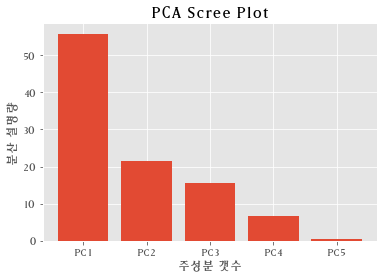

In [23]:
# 스크리 도표도 한번 그려보자.
percent_variance = np.round(pca.explained_variance_ratio_ * 100, decimals=2)
columns = []

for i in range(len(percent_variance)):
    columns.append(f'PC{i+1}')

ax = plt.bar(x=range(len(percent_variance)), height=percent_variance, tick_label=columns)
plt.rcParams['figure.figsize'] = (20, 15)
plt.xlabel('주성분 갯수')
plt.ylabel('분산 설명량')
plt.title('PCA Scree Plot')
plt.show()

- 5개의 연속형 속성 $\rightarrow$ 3개의 주성분
    - 2 차원 낮아짐.
    - 3개의 주성분으로 데이터를 설명할수 있다? 로 봐야하나?

https://plotly.com/python/pca-visualization/

<br>

괜찮은 방법 하나 찾은 것 같다.

In [24]:
import plotly.express as px

ModuleNotFoundError: No module named 'plotly'

In [25]:
!pip install plotly

    예시 코드 보고 같이 따라서 쳐보자.

In [26]:
import plotly.express as px

In [34]:
components = pca.fit_transform(X)

In [35]:
labels = {
    str(i) : f"PC{i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(5)
)
fig.update_traces(diagonal_visible=False)
fig.show()
# label이 연속형이라 뭘 어찌 할수가 없는건가?